# pandas_learning

In [1]:
import numpy as np
import pandas as pd

## 一、生成对象

In [2]:
# 用值列表生成 Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
# 用含日期时间索引与标签的 NumPy 数组生成
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [4]:
# 用含日期时间索引与标签的 NumPy 数组生成 DataFrame
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -0.490432  1.341003 -0.350064 -1.128517
2013-01-02  2.097826 -0.184385  0.701016  0.110131
2013-01-03  0.626084  1.155184 -0.340739  1.792840
2013-01-04  0.418219 -0.551569  0.878323 -0.454765
2013-01-05  0.342240 -1.456387  1.389543 -1.012628
2013-01-06 -1.037013 -1.308806 -0.414125  2.011082


In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

print(df2)
print('\n')
df2

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo




,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# DataFrame 的列有不同数据类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 二、查看数据

In [7]:
# 查看数据表头
df.head()

# 查看数据尾部
df.tail(3)

,A,B,C,D
2013-01-04,0.418219,-0.551569,0.878323,-0.454765
2013-01-05,0.342240,-1.456387,1.389543,-1.012628
2013-01-06,-1.037013,-1.308806,-0.414125,2.011082


In [8]:
# 显示索引(行名)
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# 显示列名
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() 输出底层数据的 NumPy 对象。注意，DataFrame 的列由多种数据类型组成时，该操作耗费系统资源较大，这也是 Pandas 和 NumPy 的本质区别：NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同。调用 DataFrame.to_numpy() 时，Pandas 查找支持 DataFrame 里所有数据类型的 NumPy 数据类型。还有一种数据类型是 object，可以把 DataFrame 列里的值强制转换为 Python 对象。

In [10]:
df.to_numpy()
# DataFrame.to_numpy() 的输出不包含行索引和列标签。

array([[-0.49043231,  1.34100341, -0.35006351, -1.12851705],
       [ 2.09782571, -0.18438459,  0.70101634,  0.11013148],
       [ 0.62608362,  1.15518436, -0.34073901,  1.79283954],
       [ 0.41821905, -0.5515692 ,  0.8783226 , -0.45476542],
       [ 0.34224006, -1.4563874 ,  1.38954313, -1.01262842],
       [-1.03701303, -1.30880558, -0.41412501,  2.01108196]])

In [11]:
# 快速查看数据的统计摘要
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.326154,-0.167493,0.310659,0.219690
std,1.073550,1.194712,0.777791,1.377465
min,-1.037013,-1.456387,-0.414125,-1.128517
25%,-0.282264,-1.119496,-0.347732,-0.873163
50%,0.380230,-0.367977,0.180139,-0.172317
75%,0.574117,0.820292,0.833996,1.372163
max,2.097826,1.341003,1.389543,2.011082


In [12]:
# 转置数据
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.490432,2.097826,0.626084,0.418219,0.342240,-1.037013
B,1.341003,-0.184385,1.155184,-0.551569,-1.456387,-1.308806
C,-0.350064,0.701016,-0.340739,0.878323,1.389543,-0.414125
D,-1.128517,0.110131,1.792840,-0.454765,-1.012628,2.011082


In [13]:
# 按轴排序
df.sort_index(axis=1,ascending=False)
df.sort_index(axis=1,ascending =True)

,A,B,C,D
2013-01-01,-0.490432,1.341003,-0.350064,-1.128517
2013-01-02,2.097826,-0.184385,0.701016,0.110131
2013-01-03,0.626084,1.155184,-0.340739,1.792840
2013-01-04,0.418219,-0.551569,0.878323,-0.454765
2013-01-05,0.342240,-1.456387,1.389543,-1.012628
2013-01-06,-1.037013,-1.308806,-0.414125,2.011082


In [14]:
# 按值排序：
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.342240,-1.456387,1.389543,-1.012628
2013-01-06,-1.037013,-1.308806,-0.414125,2.011082
2013-01-04,0.418219,-0.551569,0.878323,-0.454765
2013-01-02,2.097826,-0.184385,0.701016,0.110131
2013-01-03,0.626084,1.155184,-0.340739,1.792840
2013-01-01,-0.490432,1.341003,-0.350064,-1.128517


## 三、选择
选择、设置标准 Python / Numpy 的表达式已经非常直观，交互也很方便，但对于生产代码，我们还是推荐优化过的 Pandas 数据访问方法：.at、.iat、.loc 和 .iloc

### （一）获取数据

In [15]:
# 选择列
# 选择单列，产生 Series，与 df.A 等效：
df['A']

df.A

2013-01-01   -0.490432
2013-01-02    2.097826
2013-01-03    0.626084
2013-01-04    0.418219
2013-01-05    0.342240
2013-01-06   -1.037013
Freq: D, Name: A, dtype: float64

In [16]:
# 选择行
print(df[0:3])

print('\n')

# 根据条件选择行
print(df['20130102':'20130104'])

                   A         B         C         D
2013-01-01 -0.490432  1.341003 -0.350064 -1.128517
2013-01-02  2.097826 -0.184385  0.701016  0.110131
2013-01-03  0.626084  1.155184 -0.340739  1.792840


                   A         B         C         D
2013-01-02  2.097826 -0.184385  0.701016  0.110131
2013-01-03  0.626084  1.155184 -0.340739  1.792840
2013-01-04  0.418219 -0.551569  0.878323 -0.454765


### （二）按照标签选择

In [17]:
# 用标签提取一行数据
df.loc[dates[0]]  

A   -0.490432
B    1.341003
C   -0.350064
D   -1.128517
Name: 2013-01-01 00:00:00, dtype: float64

In [18]:
# 用标签选择多列数据：
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.490432,1.341003
2013-01-02,2.097826,-0.184385
2013-01-03,0.626084,1.155184
2013-01-04,0.418219,-0.551569
2013-01-05,0.342240,-1.456387
2013-01-06,-1.037013,-1.308806


In [19]:
# 用标签切片，包含行与列结束点：
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,2.097826,-0.184385
2013-01-03,0.626084,1.155184
2013-01-04,0.418219,-0.551569


In [20]:
# 返回对象降维：
df.loc['20130102', ['A', 'B']]

A    2.097826
B   -0.184385
Name: 2013-01-02 00:00:00, dtype: float64

In [21]:
# 提取标量值：
df.loc[dates[0], 'A']

df.loc['20130101', 'A']

-0.490432312502826

### （三）按位置选择

In [22]:
# 用整数位置选择：
df.iloc[3]

A    0.418219
B   -0.551569
C    0.878323
D   -0.454765
Name: 2013-01-04 00:00:00, dtype: float64

In [23]:
# 类似 NumPy / Python，用整数切片：
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.418219,-0.551569
2013-01-05,0.342240,-1.456387


In [24]:
# 类似 NumPy / Python，用整数列表按位置切片：
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,2.097826,0.701016
2013-01-03,0.626084,-0.340739
2013-01-05,0.342240,1.389543


In [25]:
# 显式整行切片：
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,2.097826,-0.184385,0.701016,0.110131
2013-01-03,0.626084,1.155184,-0.340739,1.792840


In [26]:
# 显式整列切片：
df.iloc[:, 1:3]

,B,C
2013-01-01,1.341003,-0.350064
2013-01-02,-0.184385,0.701016
2013-01-03,1.155184,-0.340739
2013-01-04,-0.551569,0.878323
2013-01-05,-1.456387,1.389543
2013-01-06,-1.308806,-0.414125


In [27]:
# 显式提取值：
df.iloc[1, 1]
df.iat[1, 1]

-0.18438458703585694

### （四）布尔索引

In [28]:
# 用单列的值选择数据：
df[df.B > 0]

,A,B,C,D
2013-01-01,-0.490432,1.341003,-0.350064,-1.128517
2013-01-03,0.626084,1.155184,-0.340739,1.792840


In [29]:
# 选择 DataFrame 里满足条件的值：
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.341003,NaN,NaN
2013-01-02,2.097826,NaN,0.701016,0.110131
2013-01-03,0.626084,1.155184,NaN,1.792840
2013-01-04,0.418219,NaN,0.878323,NaN
2013-01-05,0.342240,NaN,1.389543,NaN
2013-01-06,NaN,NaN,NaN,2.011082


In [30]:
# 用 isin() 筛选：
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2['time'] = ['1st','2nd','3rd','4th','5th','6th']
print(df2)

df2[df2['E'].isin(['two', 'four'])]

                   A         B         C         D      E time
2013-01-01 -0.490432  1.341003 -0.350064 -1.128517    one  1st
2013-01-02  2.097826 -0.184385  0.701016  0.110131    one  2nd
2013-01-03  0.626084  1.155184 -0.340739  1.792840    two  3rd
2013-01-04  0.418219 -0.551569  0.878323 -0.454765  three  4th
2013-01-05  0.342240 -1.456387  1.389543 -1.012628   four  5th
2013-01-06 -1.037013 -1.308806 -0.414125  2.011082  three  6th


,A,B,C,D,E,time
2013-01-03,0.626084,1.155184,-0.340739,1.792840,two,3rd
2013-01-05,0.342240,-1.456387,1.389543,-1.012628,four,5th


### （五）赋值

In [31]:
# 用索引自动对齐新增列的数据：
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [32]:
# 按标签赋值：
df.at[dates[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,1.341003,-0.350064,-1.128517
2013-01-02,2.097826,-0.184385,0.701016,0.110131
2013-01-03,0.626084,1.155184,-0.340739,1.792840
2013-01-04,0.418219,-0.551569,0.878323,-0.454765
2013-01-05,0.342240,-1.456387,1.389543,-1.012628
2013-01-06,-1.037013,-1.308806,-0.414125,2.011082


In [33]:
# 按位置赋值：
df.iat[0, 1] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.350064,-1.128517
2013-01-02,2.097826,-0.184385,0.701016,0.110131
2013-01-03,0.626084,1.155184,-0.340739,1.792840
2013-01-04,0.418219,-0.551569,0.878323,-0.454765
2013-01-05,0.342240,-1.456387,1.389543,-1.012628
2013-01-06,-1.037013,-1.308806,-0.414125,2.011082


In [34]:
# 按 NumPy 数组赋值：
df.loc[:, 'D'] = np.array([5] * len(df))
df

C:\Users\Allen\AppData\Local\Temp\ipykernel_13872\531792459.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


,A,B,C,D
2013-01-01,0.000000,0.000000,-0.350064,5
2013-01-02,2.097826,-0.184385,0.701016,5
2013-01-03,0.626084,1.155184,-0.340739,5
2013-01-04,0.418219,-0.551569,0.878323,5
2013-01-05,0.342240,-1.456387,1.389543,5
2013-01-06,-1.037013,-1.308806,-0.414125,5


In [35]:
# 用 where 条件赋值：
df2 = df.copy()
print(df2)

df2[df2 > 0] = -df2
df2

                   A         B         C  D
2013-01-01  0.000000  0.000000 -0.350064  5
2013-01-02  2.097826 -0.184385  0.701016  5
2013-01-03  0.626084  1.155184 -0.340739  5
2013-01-04  0.418219 -0.551569  0.878323  5
2013-01-05  0.342240 -1.456387  1.389543  5
2013-01-06 -1.037013 -1.308806 -0.414125  5


,A,B,C,D
2013-01-01,0.000000,0.000000,-0.350064,-5
2013-01-02,-2.097826,-0.184385,-0.701016,-5
2013-01-03,-0.626084,-1.155184,-0.340739,-5
2013-01-04,-0.418219,-0.551569,-0.878323,-5
2013-01-05,-0.342240,-1.456387,-1.389543,-5
2013-01-06,-1.037013,-1.308806,-0.414125,-5


## 四、缺失值
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。详见缺失数据。

In [36]:
# 重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.350064,5,1.0
2013-01-02,2.097826,-0.184385,0.701016,5,1.0
2013-01-03,0.626084,1.155184,-0.340739,5,NaN
2013-01-04,0.418219,-0.551569,0.878323,5,NaN


In [37]:
# 删除所有含缺失值的行：
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.350064,5,1.0
2013-01-02,2.097826,-0.184385,0.701016,5,1.0


In [38]:
# 填充缺失值
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.350064,5,1.0
2013-01-02,2.097826,-0.184385,0.701016,5,1.0
2013-01-03,0.626084,1.155184,-0.340739,5,5.0
2013-01-04,0.418219,-0.551569,0.878323,5,5.0


In [39]:
# 提取 nan 值的布尔掩码：
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 五、运算

### （一）统计

In [40]:
# 描述性统计：
df.mean()

A    0.407893
B   -0.390994
C    0.310659
D    5.000000
dtype: float64

In [41]:
# 在另一个轴(即，行)上执行同样的操作：
print(df)
df.mean(1)

                   A         B         C  D
2013-01-01  0.000000  0.000000 -0.350064  5
2013-01-02  2.097826 -0.184385  0.701016  5
2013-01-03  0.626084  1.155184 -0.340739  5
2013-01-04  0.418219 -0.551569  0.878323  5
2013-01-05  0.342240 -1.456387  1.389543  5
2013-01-06 -1.037013 -1.308806 -0.414125  5


2013-01-01    1.162484
2013-01-02    1.903614
2013-01-03    1.610132
2013-01-04    1.436243
2013-01-05    1.318849
2013-01-06    0.560014
Freq: D, dtype: float64

In [42]:
# 不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播。
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

### （二）Apply函数

In [43]:
# Apply 函数处理数据：
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.350064,5
2013-01-02,2.097826,-0.184385,0.350953,10
2013-01-03,2.723909,0.970800,0.010214,15
2013-01-04,3.142128,0.419231,0.888536,20
2013-01-05,3.484368,-1.037157,2.278080,25
2013-01-06,2.447355,-2.345962,1.863955,30


### （三）直方图

In [44]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    3
2    4
3    5
4    4
5    2
6    1
7    2
8    0
9    0
dtype: int32

In [45]:
s.value_counts()

1    2
4    2
2    2
0    2
3    1
5    1
dtype: int64

### （四）字符串方法

In [46]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 五、合并

### （一）结合（concat）
Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。

In [47]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.920086,0.367632,2.497282,0.066091
1,-0.604439,1.692157,-0.805864,1.755445
2,-0.585767,0.946251,0.196929,1.496892
3,-0.200327,-0.574453,-0.255195,-0.317823
4,1.273022,0.874491,1.619386,1.956572
5,-1.045788,2.007894,0.113608,-0.576531
6,0.947761,1.959843,1.525449,-0.859118
7,0.753344,0.290895,-1.511461,1.335855
8,-2.731952,0.122681,-1.543743,-1.982785
9,0.095608,-2.362279,-0.386469,1.895013


In [48]:
# 分解为多个组
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.920086  0.367632  2.497282  0.066091
 1 -0.604439  1.692157 -0.805864  1.755445
 2 -0.585767  0.946251  0.196929  1.496892,
           0         1         2         3
 3 -0.200327 -0.574453 -0.255195 -0.317823
 4  1.273022  0.874491  1.619386  1.956572
 5 -1.045788  2.007894  0.113608 -0.576531
 6  0.947761  1.959843  1.525449 -0.859118,
           0         1         2         3
 7  0.753344  0.290895 -1.511461  1.335855
 8 -2.731952  0.122681 -1.543743 -1.982785
 9  0.095608 -2.362279 -0.386469  1.895013]

In [49]:
pd.concat(pieces)

,0,1,2,3
0,-1.920086,0.367632,2.497282,0.066091
1,-0.604439,1.692157,-0.805864,1.755445
2,-0.585767,0.946251,0.196929,1.496892
3,-0.200327,-0.574453,-0.255195,-0.317823
4,1.273022,0.874491,1.619386,1.956572
5,-1.045788,2.007894,0.113608,-0.576531
6,0.947761,1.959843,1.525449,-0.859118
7,0.753344,0.290895,-1.511461,1.335855
8,-2.731952,0.122681,-1.543743,-1.982785
9,0.095608,-2.362279,-0.386469,1.895013


### （二）连接（join）

#### 1.第一个例子

In [50]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [51]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [52]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### 2.第二个例子

In [53]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [54]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [55]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### （三）结合（append）

In [56]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.977216,0.809690,-1.092985,1.094562
1,-0.537330,0.119068,-0.270291,0.583295
2,-0.899852,-0.013189,-0.701051,-0.075777
3,-0.676315,-0.388863,-0.317767,0.200017
4,2.046481,-0.059868,-0.043779,0.073719
5,0.553642,0.585511,-0.363557,1.353199
6,-0.038520,0.867621,1.283126,0.359301
7,1.487298,-1.967855,0.781338,-0.356828


In [57]:
s = df.iloc[3]
s

A   -0.676315
B   -0.388863
C   -0.317767
D    0.200017
Name: 3, dtype: float64

In [58]:
df.append(s, ignore_index=True)

C:\Users\Allen\AppData\Local\Temp\ipykernel_13872\4011806271.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,1.977216,0.809690,-1.092985,1.094562
1,-0.537330,0.119068,-0.270291,0.583295
2,-0.899852,-0.013189,-0.701051,-0.075777
3,-0.676315,-0.388863,-0.317767,0.200017
4,2.046481,-0.059868,-0.043779,0.073719
5,0.553642,0.585511,-0.363557,1.353199
6,-0.038520,0.867621,1.283126,0.359301
7,1.487298,-1.967855,0.781338,-0.356828
8,-0.676315,-0.388863,-0.317767,0.200017


## 六、分组（group）

In [59]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.110792,1.046919
1,bar,one,0.257225,-1.405743
2,foo,two,-1.029414,-0.631213
3,bar,three,-0.696101,-0.153206
4,foo,two,0.655852,0.016673
5,bar,two,0.454345,-0.839135
6,foo,one,-1.270142,-2.196781
7,foo,three,0.491435,0.502373


In [60]:
# 用 sum()函数计算每组的汇总数据：
df.groupby('A').sum()

C:\Users\Allen\AppData\Local\Temp\ipykernel_13872\408658545.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,0.015469,-2.398085
foo,-1.041477,-1.262029


In [61]:
# 用 sum()函数计算每组的汇总数据：
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.257225 -1.405743
    three -0.696101 -0.153206
    two    0.454345 -0.839135
foo one   -1.159350 -1.149862
    three  0.491435  0.502373
    two   -0.373561 -0.614540

## 七、重塑

### （一）堆叠

In [62]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [63]:

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.293173  0.076621
      two     0.504254  0.005360
baz   one    -0.520367 -0.118466
      two    -0.280027  1.871664

In [64]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.293173
               B    0.076621
       two     A    0.504254
               B    0.005360
baz    one     A   -0.520367
               B   -0.118466
       two     A   -0.280027
               B    1.871664
dtype: float64

压缩后的 DataFrame 或 Series 具有多层索引， stack() 的逆操作是 unstack()，默认为拆叠最后一层：

In [65]:
stacked.unstack()

A         B
first second                    
bar   one     0.293173  0.076621
      two     0.504254  0.005360
baz   one    -0.520367 -0.118466
      two    -0.280027  1.871664

In [66]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.293173  0.504254
      B  0.076621  0.005360
baz   A -0.520367 -0.280027
      B -0.118466  1.871664

## 八、数据透视表

In [67]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.768843,-2.404768
1,one,B,foo,-1.296745,1.205640
2,two,C,foo,-0.374749,-0.545797
3,three,A,bar,-0.504192,1.104782
4,one,B,bar,-0.893779,-0.056505
5,one,C,bar,-0.671526,-1.454542
6,two,A,foo,1.234484,1.087237
7,three,B,foo,0.316961,-1.333247
8,one,C,foo,1.342511,-0.712946
9,one,A,bar,-0.263245,-0.278933


In [68]:
# 生成数据透视表
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.263245  1.768843
      B -0.893779 -1.296745
      C -0.671526  1.342511
three A -0.504192       NaN
      B       NaN  0.316961
      C  1.257256       NaN
two   A       NaN  1.234484
      B -2.146075       NaN
      C       NaN -0.374749

## 九、时间序列
Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。详见时间序列

In [69]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24914
Freq: 5T, dtype: int32

In [70]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.095941
2012-03-07    0.152061
2012-03-08    0.123898
2012-03-09   -0.291567
2012-03-10   -1.162841
Freq: D, dtype: float64

In [71]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.095941
2012-03-07 00:00:00+00:00    0.152061
2012-03-08 00:00:00+00:00    0.123898
2012-03-09 00:00:00+00:00   -0.291567
2012-03-10 00:00:00+00:00   -1.162841
Freq: D, dtype: float64

In [72]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.095941
2012-03-06 19:00:00-05:00    0.152061
2012-03-07 19:00:00-05:00    0.123898
2012-03-08 19:00:00-05:00   -0.291567
2012-03-09 19:00:00-05:00   -1.162841
Freq: D, dtype: float64

In [73]:
# 转换时间段：
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.688979
2012-02-29   -0.748789
2012-03-31   -0.703756
2012-04-30   -0.933271
2012-05-31    0.548897
Freq: M, dtype: float64

In [74]:
ps = ts.to_period()
ps

2012-01   -0.688979
2012-02   -0.748789
2012-03   -0.703756
2012-04   -0.933271
2012-05    0.548897
Freq: M, dtype: float64

In [75]:
ps.to_timestamp()

2012-01-01   -0.688979
2012-02-01   -0.748789
2012-03-01   -0.703756
2012-04-01   -0.933271
2012-05-01    0.548897
Freq: MS, dtype: float64

In [76]:
# Pandas 函数可以很方便地转换时间段与时间戳。下例把以 11 月为结束年份的季度频率转换为下一季度月末上午 9 点：
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.343270
1990-06-01 09:00    0.108602
1990-09-01 09:00   -1.729255
1990-12-01 09:00    2.244965
1991-03-01 09:00    1.186678
Freq: H, dtype: float64

## 十、类别型
Pandas 的 DataFrame 里可以包含类别数据。完整文档详见类别简介 和 API 文档。

In [77]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [78]:
# 将 grade 的原生数据转换为类别型数据：
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [79]:
# 用有含义的名字重命名不同类型，调用 Series.cat.categories。
df["grade"].cat.categories = ["very good", "good", "very bad"]

C:\Users\Allen\AppData\Local\Temp\ipykernel_13872\861203465.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [80]:
# 重新排序各类别，并添加缺失类，Series.cat 的方法默认返回新 Series。
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [81]:
# 注意，这里是按生成类别时的顺序排序，不是按词汇排序：
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [82]:
# 按类列分组（groupby）时，即便某类别为空，也会显示：
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 十一、可视化

<AxesSubplot:>

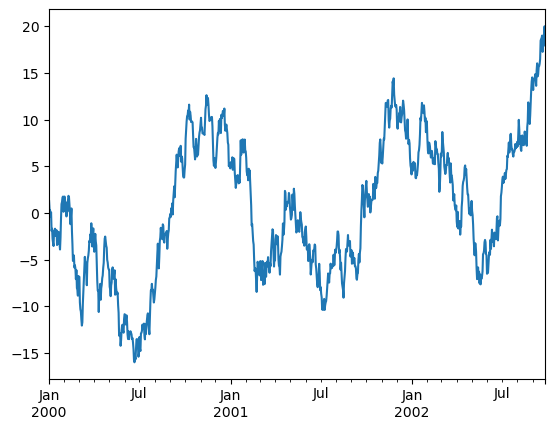

In [83]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

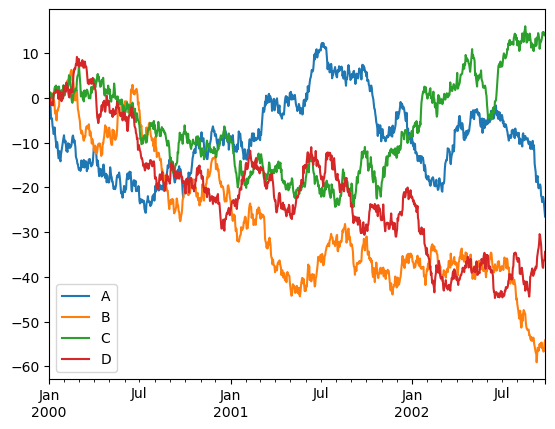

In [84]:
# DataFrame 的 plot() 方法可以快速绘制所有带标签的列：
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
df.plot()

## 十二、数据输入/输出

In [85]:
# 写入 CSV 文件
df.to_csv('foo.csv')

In [86]:
# 读取 CSV 文件数据：
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.196217,-0.567679,-0.017399,-0.759675
1,2000-01-02,-0.992873,1.045825,0.751507,0.135319
2,2000-01-03,-1.139351,0.485977,1.263285,-0.954968
3,2000-01-04,-2.328024,0.945480,1.115053,-1.166374
4,2000-01-05,-4.682187,-1.138483,0.378853,-1.588296
...,...,...,...,...,...
995,2002-09-22,-22.127260,-56.337832,14.308220,-37.997555
996,2002-09-23,-22.683999,-56.727513,14.728768,-36.391624
997,2002-09-24,-24.029579,-55.935110,14.212392,-36.302242
998,2002-09-25,-25.639169,-54.762663,13.965459,-35.999471


In [87]:
# 写入 Excel 文件：
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [88]:
# 读取 Excel 文件：
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.196217,-0.567679,-0.017399,-0.759675
1,2000-01-02,-0.992873,1.045825,0.751507,0.135319
2,2000-01-03,-1.139351,0.485977,1.263285,-0.954968
3,2000-01-04,-2.328024,0.945480,1.115053,-1.166374
4,2000-01-05,-4.682187,-1.138483,0.378853,-1.588296
...,...,...,...,...,...
995,2002-09-22,-22.127260,-56.337832,14.308220,-37.997555
996,2002-09-23,-22.683999,-56.727513,14.728768,-36.391624
997,2002-09-24,-24.029579,-55.935110,14.212392,-36.302242
998,2002-09-25,-25.639169,-54.762663,13.965459,-35.999471
